<a href="https://colab.research.google.com/github/HarshaVardhan171/Dynamic-Pricing-Recommendation-Engine/blob/main/DynPriRecEngEcom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT: Dynamic Pricing Recommendation Engine Using Simulated Data**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("/content/Dynamic Pricing Engine Dataset.csv", parse_dates=['Date'], dayfirst=False)

# Quick preview
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row Number        1000 non-null   int64         
 1   Product_ID        1000 non-null   object        
 2   Category          1000 non-null   object        
 3   Rating            1000 non-null   int64         
 4   Base_Price        1000 non-null   int64         
 5   Discount_Percent  1000 non-null   int64         
 6   Final_Price       1000 non-null   float64       
 7   Competitor_Price  1000 non-null   float64       
 8   Promotion         1000 non-null   bool          
 9   Units_Sold        1000 non-null   int64         
 10  Date              1000 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 79.2+ KB


In [36]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [37]:
df['revenue'] = df['Final_Price'] * df['Units_Sold']

summary = {
    'Total Records': len(df),
    'Unique Products': df['Product_ID'].nunique(),
    'Total Revenue': df['revenue'].sum(),
    'Average Final Price': df['Final_Price'].mean(),
    'Average Units Sold': df['Units_Sold'].mean()
}

pd.DataFrame([summary])


,Total Records,Unique Products,Total Revenue,Average Final Price,Average Units Sold
0,1000,1000,72225805.75,1875.39319,45.202


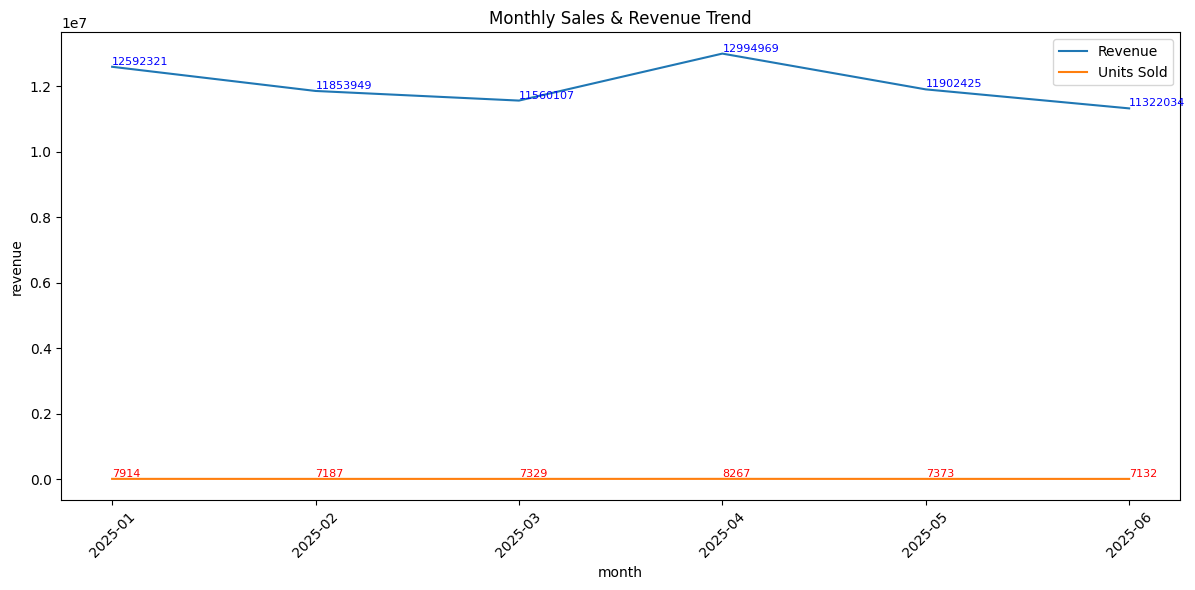

In [39]:
df['month'] = pd.to_datetime(df['Date']).dt.to_period('M')

monthly = df.groupby('month').agg({'revenue':'sum', 'Units_Sold':'sum'}).reset_index()

monthly['month'] = monthly['month'].astype(str)

plt.figure(figsize=(12,6))
ax = sns.lineplot(data=monthly, x='month', y='revenue', label='Revenue')
sns.lineplot(data=monthly, x='month', y='Units_Sold', label='Units Sold')
plt.title("Monthly Sales & Revenue Trend")
plt.xticks(rotation=45)
plt.tight_layout()

# Add data labels
for x, y in zip(monthly['month'], monthly['revenue']):
    ax.text(x, y, f'{y:.0f}', color='blue', ha='left', va='bottom', fontsize=8)
for x, y in zip(monthly['month'], monthly['Units_Sold']):
    ax.text(x, y, f'{y:.0f}', color='red', ha='left', va='bottom', fontsize=8)

plt.show()

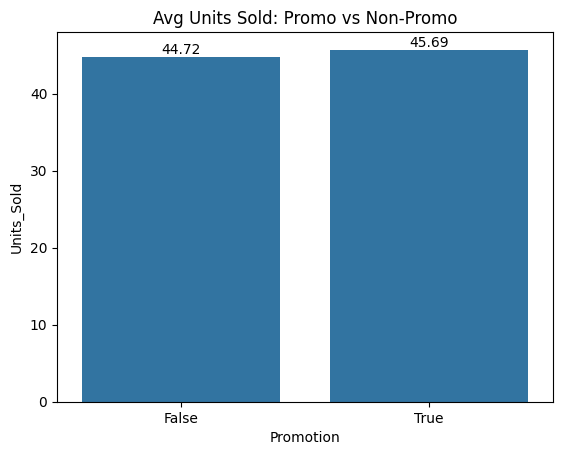

In [40]:
promo_stats = df.groupby('Promotion').agg({
    'Units_Sold': 'mean',
    'revenue': 'mean'
}).reset_index()

ax = sns.barplot(data=promo_stats, x='Promotion', y='Units_Sold')
plt.title("Avg Units Sold: Promo vs Non-Promo")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

/tmp/ipython-input-41-2828874245.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_perf = df.groupby('Discount_Bin')['Units_Sold'].mean().reset_index()


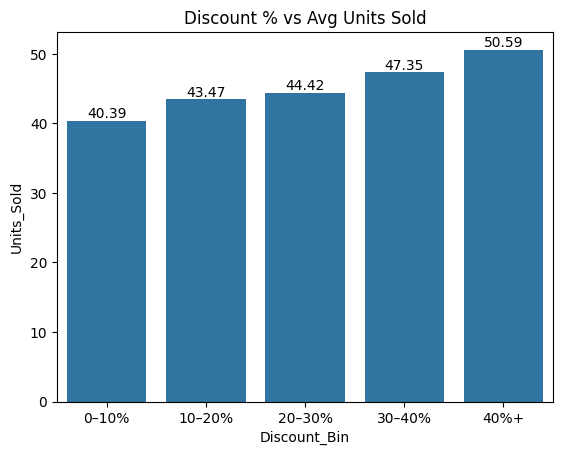

In [41]:
df['Discount_Bin'] = pd.cut(df['Discount_Percent'], bins=[0,10,20,30,40,100],
                            labels=['0–10%','10–20%','20–30%','30–40%','40%+'])

discount_perf = df.groupby('Discount_Bin')['Units_Sold'].mean().reset_index()

ax = sns.barplot(data=discount_perf, x='Discount_Bin', y='Units_Sold')
plt.title("Discount % vs Avg Units Sold")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

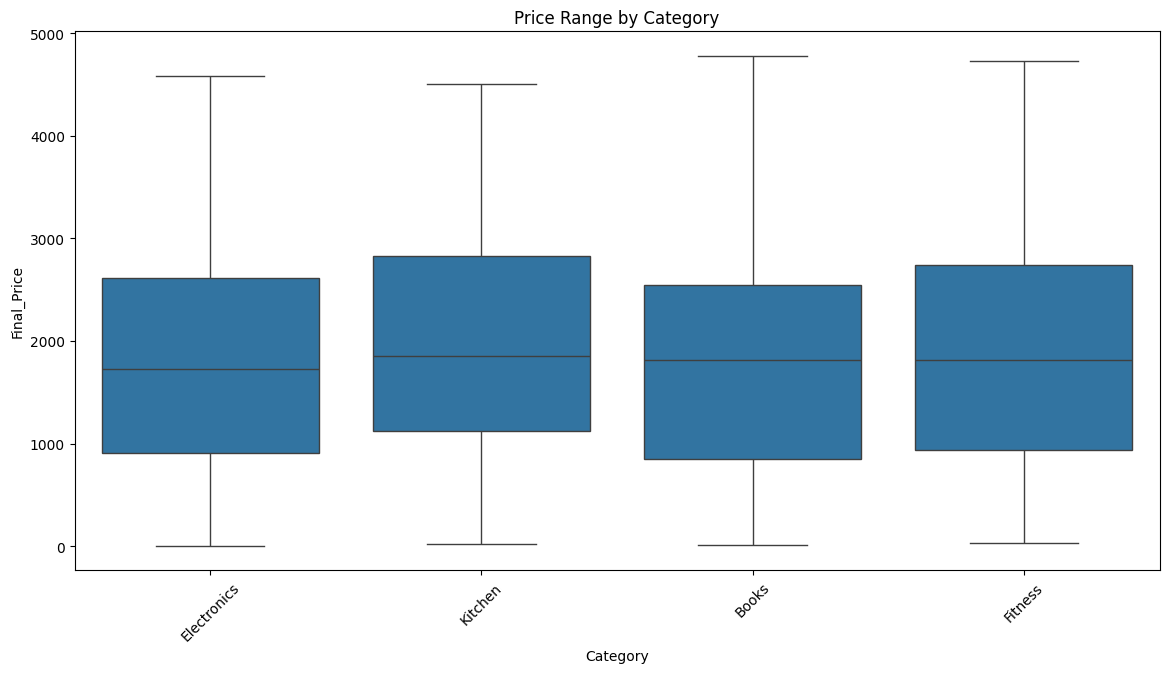

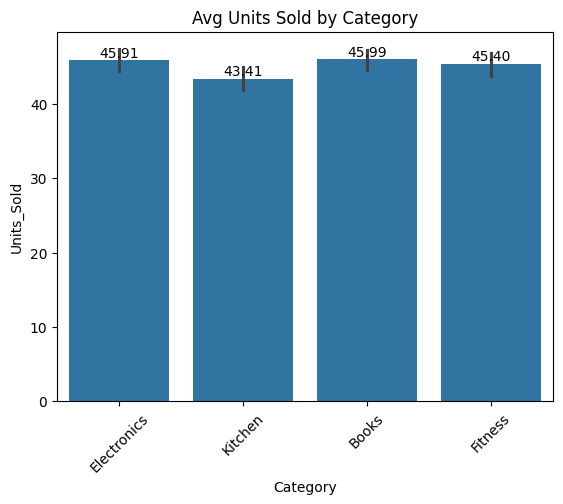

In [42]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='Category', y='Final_Price')
plt.title("Price Range by Category")
plt.xticks(rotation=45)
plt.show()

# Category vs Avg Units Sold
ax = sns.barplot(data=df, x='Category', y='Units_Sold', estimator=np.mean)
plt.title("Avg Units Sold by Category")
plt.xticks(rotation=45)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

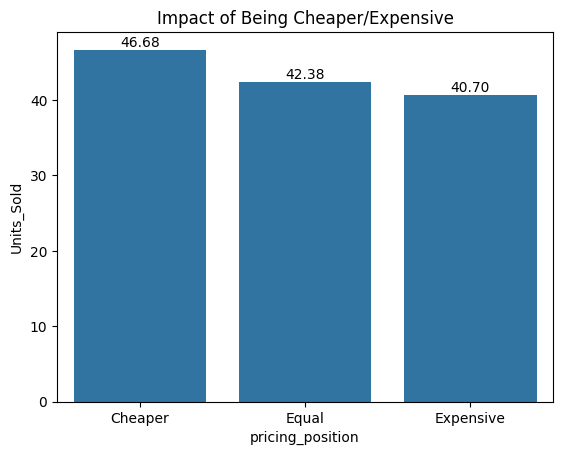

In [44]:
df['pricing_position'] = np.where(df['Final_Price'] < df['Competitor_Price'], 'Cheaper',
                           np.where(df['Final_Price'] > df['Competitor_Price'], 'Expensive', 'Equal'))

position_perf = df.groupby('pricing_position')['Units_Sold'].mean().reset_index()

ax = sns.barplot(data=position_perf, x='pricing_position', y='Units_Sold')
plt.title("Impact of Being Cheaper/Expensive")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.show()

/tmp/ipython-input-45-3369642879.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sweet_spot = df.groupby('price_band').agg({


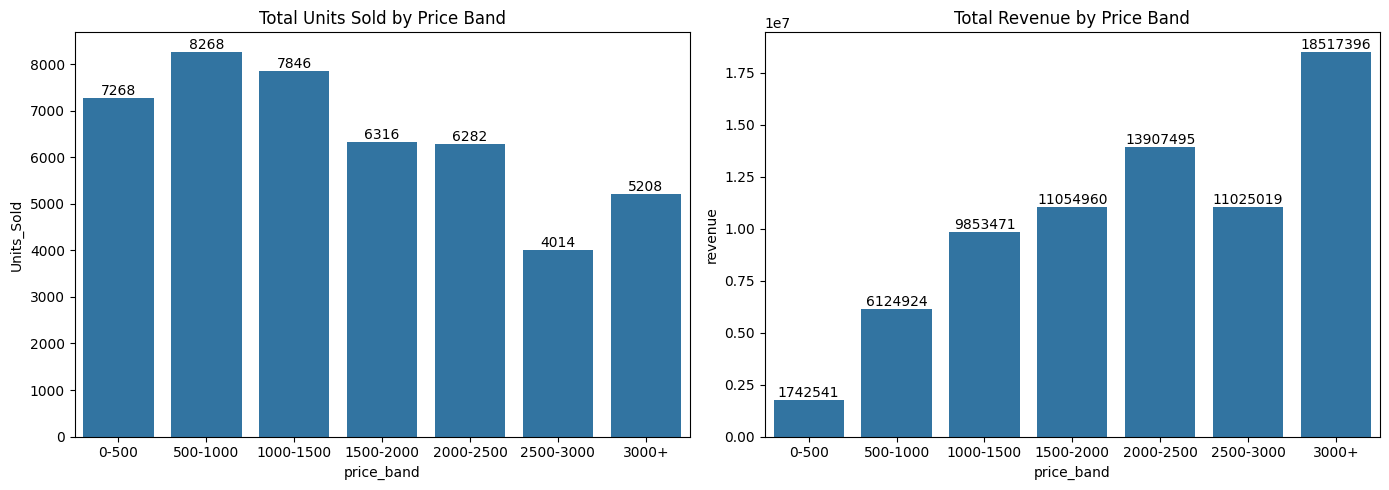

In [45]:
df['price_band'] = pd.cut(df['Final_Price'], bins=[0,500,1000,1500,2000,2500,3000,5000],
                          labels=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000','3000+'])

sweet_spot = df.groupby('price_band').agg({
    'Units_Sold': 'sum',
    'revenue': 'sum'
}).reset_index()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(data=sweet_spot, x='price_band', y='Units_Sold', ax=ax[0])
ax[0].set_title("Total Units Sold by Price Band")

# Add data labels to the first subplot
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.0f')

sns.barplot(data=sweet_spot, x='price_band', y='revenue', ax=ax[1])
ax[1].set_title("Total Revenue by Price Band")

# Add data labels to the second subplot
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.0f')

plt.tight_layout()
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features
features = ['Discount_Percent', 'Final_Price', 'Competitor_Price', 'Rating', 'Promotion']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Units_Sold']

# Split & fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

print("R² Score:", model.score(X_test, y_test))


R² Score: 0.9350060788796754
